## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#data_join_df = pd.concat([mouse_metadata, study_results], axis=0, join='outer')
data_join = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
data_join.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
total_mice = data_join.nunique()
print(total_mice)

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_join.groupby("Mouse ID")
data_join.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_join.to_csv("output/fileOne.csv", header=True)

In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame(data_join.groupby("Drug Regimen").count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe

# find summary statistics
summary_table["Mean"] = pd.DataFrame(data_join.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_table["Median"] = pd.DataFrame(data_join.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
#summary_table["Mode"] = pd.DataFrame(data_join.groupby("Drug Regimen")["Tumor Volume (mm3)"].mode())
summary_table["Variance"] = pd.DataFrame(data_join.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_table["SEM"] = pd.DataFrame(data_join.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary_table["Standard Deviation"] = pd.DataFrame(data_join.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
#remove unwanted columns from summary table
summary_table = summary_table[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

summary_table

,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#data_join = data_join["Tumor Volume (mm3)", "Drug Regimen"]
data_join.groupby("Drug Regimen").agg(['mean', 'min', 'std', 'var', 'sem']).round(decimals=4)


Age_months                              Weight (g)              \
                   mean min     std      var     sem       mean min     std   
Drug Regimen                                                                  
Capomulin       13.4565   1  7.7214  59.6204  0.5091    19.9652  15  2.7324   
Ceftamin        13.2472   2  8.0714  65.1476  0.6050    27.3989  25  1.5815   
Infubinol       16.2303   1  7.5103  56.4043  0.5629    27.1966  23  2.1838   
Ketapril        15.6596   1  6.0197  36.2364  0.4390    27.8617  25  1.8419   
Naftisol        12.0000   2  6.7159  45.1027  0.4924    27.1667  25  1.4992   
Placebo         10.7348   1  6.3549  40.3848  0.4724    27.9282  25  1.8380   
Propriva        10.8944   1  7.3046  53.3575  0.5757    27.0435  25  1.6709   
Ramicane        10.6842   1  5.9466  35.3624  0.3938    19.6798  16  3.2350   
Stelasyn        12.7845   1  7.9396  63.0366  0.5901    27.8564  25  1.6436   
Zoniferol       12.5989   2  5.7861  33.4791  0.4289    27.6923  25  1.4196   

                               ... Tumor Volume (mm3)                   \
                  var     sem  ...               mean      min     std   
Drug Regimen                   ...                                       
Capomulin      7.4660  0.1802  ...            40.6757  23.3436  4.9948   
Ceftamin       2.5010  0.1185  ...            52.5912  45.0000  6.2682   
Infubinol      4.7690  0.1637  ...            52.8848  36.3213  6.5672   
Ketapril       3.3925  0.1343  ...            55.2356  45.0000  8.2797   
Naftisol       2.2477  0.1099  ...            54.3316  45.0000  8.1347   
Placebo        3.3781  0.1366  ...            54.0336  45.0000  7.8210   
Propriva       2.7918  0.1317  ...            52.3226  45.0000  6.5078   
Ramicane      10.4653  0.2142  ...            40.2167  22.0501  4.8463   
Stelasyn       2.7015  0.1222  ...            54.2331  45.0000  7.7104   
Zoniferol      2.0153  0.1052  ...            53.2365  45.0000  6.9666   

                              Metastatic Sites                              
                  var     sem             mean min     std     var     sem  
Drug Regimen                                                                
Capomulin     24.9478  0.3293           0.7130   0  0.8490  0.7208  0.0560  
Ceftamin      39.2902  0.4698           1.1798   0  1.1843  1.4025  0.0888  
Infubinol     43.1287  0.4922           0.9607   0  1.0271  1.0549  0.0770  
Ketapril      68.5536  0.6039           1.2979   0  1.3939  1.9429  0.1017  
Naftisol      66.1735  0.5965           1.1828   0  1.2165  1.4799  0.0892  
Placebo       61.1681  0.5813           1.4420   0  1.3388  1.7924  0.0995  
Propriva      42.3511  0.5129           0.9752   0  1.0837  1.1744  0.0854  
Ramicane      23.4867  0.3210           0.5482   0  0.6913  0.4778  0.0458  
Stelasyn      59.4506  0.5731           0.8729   0  0.9720  0.9449  0.0723  
Zoniferol     48.5334  0.5164           1.2308   0  1.2489  1.5597  0.0926  

[10 rows x 25 columns]

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

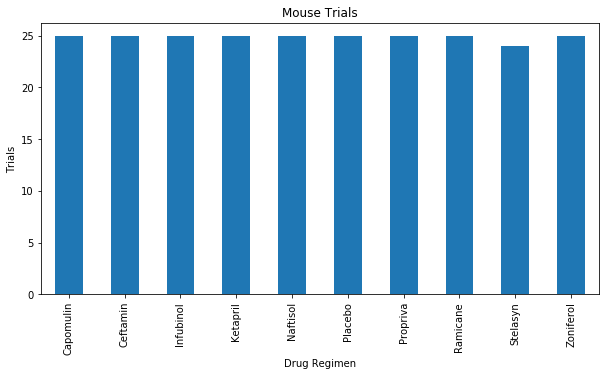

In [19]:
data_points = data_join.groupby(["Drug Regimen"]).nunique()["Mouse ID"]
#data_points

data_points.plot(kind="bar", figsize=(10,5))
plt.title("Mouse Trials")
plt.ylabel("Trials")
plt.xlabel("Drug Regimen")


Text(0.5, 1.0, 'Unique Mice per Drug Regime')

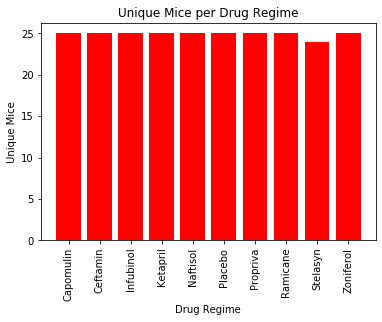

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(data_points))
tick_locations = [val for val in x_axis]

# create bar plot
plt.bar(x_axis, data_points, color="r" )
plt.xticks(tick_locations, data_points.index.values, rotation="vertical")
#set labels
plt.xlabel("Drug Regime")
plt.ylabel("Unique Mice")
plt.title("Unique Mice per Drug Regime")

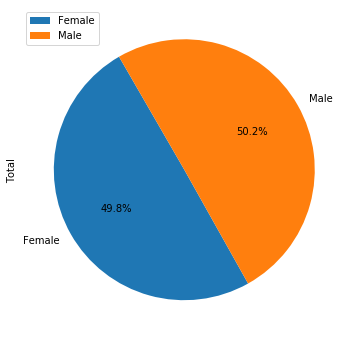

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = data_join.groupby(["Mouse ID", "Sex"])

gender_df = pd.DataFrame(gender_group.size())

gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["Total"]
gender.head()
#gender_df.plot.pie()
#for row in range(0, len(data_points["Mouse ID"])):
 #   if data_points["Gender"] == "Male"
  #      male_count =+ 1
   # else
    #    female_count =+ 1
plot = gender.plot.pie(y='Total', figsize=(6,6), startangle=120, autopct="%1.1f%%")

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x1ab417c9548>,
 [Text(0.006939175976765795, 1.0999781124353174, ''),
  Text(-0.006939175976765929, -1.0999781124353174, '')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

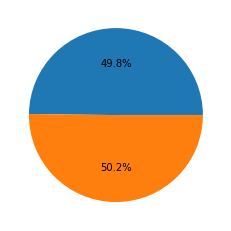

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender,autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimes = data_join[data_join["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
